In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transforms.ToTensor())
num_workers = 0
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

In [ ]:
# define the NN architecture
class ConvAutoencoder1(nn.Module):
    def __init__(self):
        super(ConvAutoencoder1, self).__init__()
           
        ## encoder layers ##
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  
        
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)

    def forward(self, x):
        ## encode ##
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x) 
        
        ## decode ##
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))
                
        return x



In [ ]:
model=ConvAutoencoder1()
criterion = nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters())

In [ ]:
n_epochs=10
result=[]

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    
    for data in train_loader:
        
        images, _ = data
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))
    result.append((images,outputs))

Epoch: 1 	Training Loss: 3.114195
Epoch: 2 	Training Loss: 2.337770
Epoch: 3 	Training Loss: 2.220785
Epoch: 4 	Training Loss: 2.155126
Epoch: 5 	Training Loss: 2.118875
Epoch: 6 	Training Loss: 2.094853
Epoch: 7 	Training Loss: 2.078944
Epoch: 8 	Training Loss: 2.067046
Epoch: 9 	Training Loss: 2.057343
Epoch: 10 	Training Loss: 2.049056


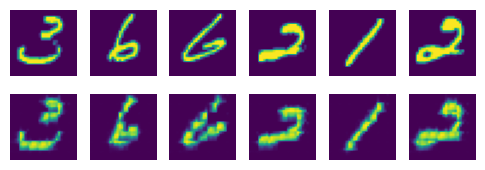

In [ ]:
for k in range(0,1,2):
  plt.figure(figsize=(6,2))
  real_img=result[k][0].detach().numpy()
  const=result[k][1].detach().numpy()
  for j, item in enumerate(real_img):
    if j>=6:
      break
    plt.subplot(2,6,j+1)
    plt.axis('off')
    plt.imshow(item.reshape(28,28))
  for i, item in enumerate(const):
    if i>=6:
      break
    plt.subplot(2,6,6+i+1)
    plt.axis('off')
    plt.imshow(item.reshape(28,28)) 
